## **Algoritmo de filtraje no lineal basado en Operador de Koopman aplicado a epidemiología**

### **Capítulo 3: Kernel Extended Dynamic Mode Decomposition**

**Autor: Diego Olguín.**

**Supervisores: Héctor Ramírez y Axel Osses.**

In [32]:
chapter = "chapter3/"
img_path = "img/content/"+chapter

In [33]:
# Librerías generales
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

sns.set_theme()

from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# Plotly
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Librerías propias
import os

# Dependencias de kkf
from kkf.DynamicalSystems import DynamicalSystem
from kkf.kEDMD import KoopmanOperator

In [34]:
# Configuración de parámetros para Matplotlib
plt.rcParams.update({'font.size': 24})
plt.rcParams.update({'axes.labelsize': 24})
plt.rcParams.update({'axes.titlesize': 24})
plt.rcParams.update({'legend.fontsize': 24})
plt.rcParams.update({'xtick.labelsize': 24})
plt.rcParams.update({'ytick.labelsize': 24})
plt.rcParams.update({'figure.figsize': (12, 10)})
plt.rcParams.update({'figure.titlesize': 28})

In [35]:
# Ajustar directorio para las imagénes
root = "/Users/diegoolguin/Koopman_nonlinear_filter"
if not os.getcwd()==root:
    os.chdir(root)

### **kEDMD en el caso de modelos lineales**

In [36]:
# Observaciones del sistema, irrelevantes para este ejemplo
def g(x):
    return x

# Dimensiones y el kernel
N = 2500
nx, ny = 3, 3

# Distribuciones
X_dist = stats.multivariate_normal(mean=np.zeros(nx), cov=3*np.eye(3))
dyn_dist = stats.multivariate_normal(mean=np.zeros(nx), cov=1e-7*np.eye(3))
obs_dist = stats.multivariate_normal(mean=np.zeros(1), cov=1e-7*np.eye(1))

# Datos sintéticos
iters = 50
x0 = np.array([0.1, 0.1, 0.1])

# Tiempo
t = np.arange(iters)

In [37]:
# Función auxiliar para cálculo de kEDMD en el caso lineal
def compute_linear_kedmd(alpha, N, optimize=False):
    # Matriz
    A = np.array([
        [0.01, 0.04, 0.0],
        [0.01, 0.02, alpha],
        [0.0, 0.04, 0.02]
    ])

    # Función de dinámica
    f = lambda x: x + A@x

    # Solución real
    x = np.zeros((iters, nx))
    x[0] = x0

    for i in range(1, iters):
        x[i] = f(x[i-1])

    # Sistema dinámico
    dyn = DynamicalSystem(nx, ny, f, g, X_dist, dyn_dist, obs_dist, discrete_time=True)

    # Operador de Koopman
    Koop = KoopmanOperator(k, dyn)

    # Se calcula kEDMD
    Koop.compute_edmd(N, optimize=optimize)
    U, B, phi = Koop.U, Koop.B, Koop.phi

    # Sistema con Koopman
    x_koop = np.zeros((iters, nx))
    x_koop[0] = B@phi(x0)
    z = np.zeros((iters, N))
    z[0] = phi(x0)

    for i in range(1, iters):
        z[i] = U@z[i-1]
        x_koop[i] = B@z[i]

    return x, x_koop, A, U

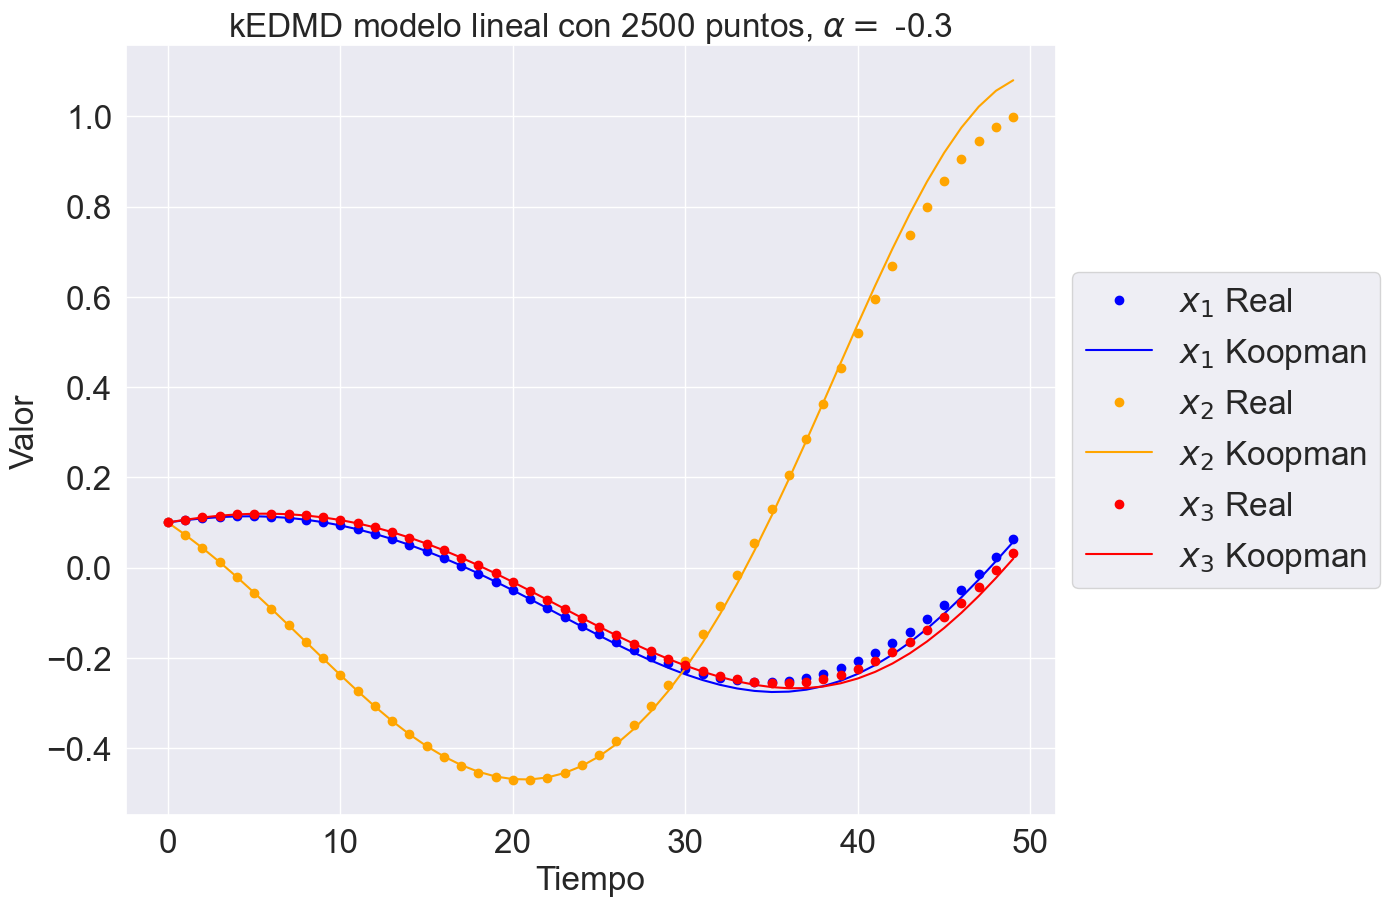

In [38]:
# Kernel
k = Matern(length_scale=1e3, nu=0.5)

# Alpha
alpha = -0.3

# Predicción
x, x_koop, A, U = compute_linear_kedmd(alpha, N, optimize=False)

# Gráfico
fig = plt.figure()

plt.plot(t, x[:, 0], 'o', label=r"$x_1$ Real", c='blue')
plt.plot(t, x_koop[:, 0], label=r"$x_1$ Koopman", c='blue')

plt.plot(t, x[:, 1], 'o', label=r"$x_2$ Real", c='orange')
plt.plot(t, x_koop[:, 1], label=r"$x_2$ Koopman", c='orange')

plt.plot(t, x[:, 2], 'o', label=r"$x_3$ Real", c='red')
plt.plot(t, x_koop[:, 2], label=r"$x_3$ Koopman", c='red')

plt.xlabel("Tiempo")
plt.ylabel("Valor")

# Leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(r"kEDMD modelo lineal con {} puntos, $\alpha = $ {}".format(N, alpha))
fig.savefig(img_path+"Linear1.pdf", bbox_inches='tight')

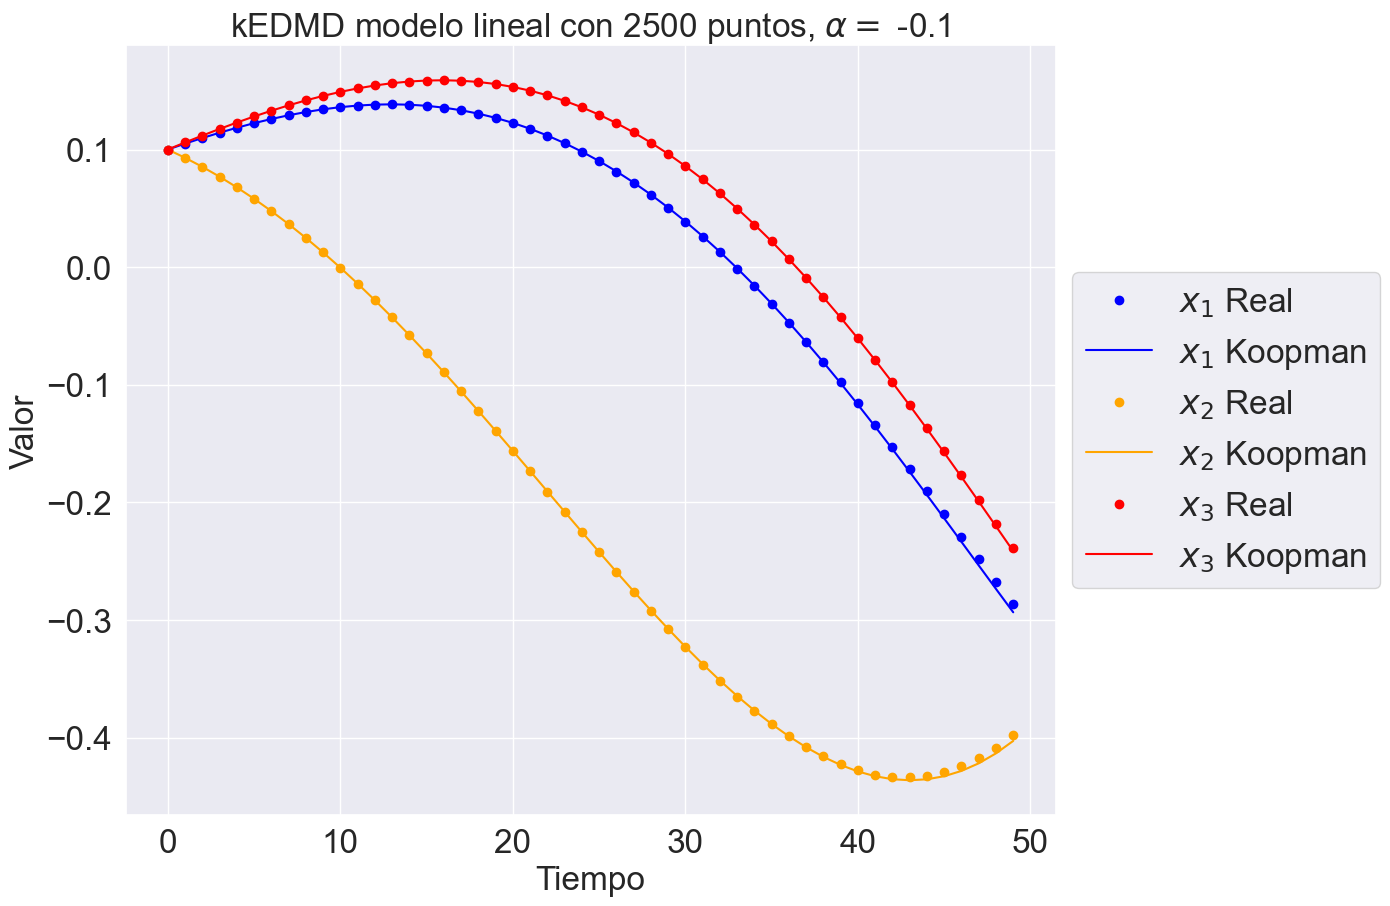

In [39]:
# Kernel
k = Matern(length_scale=1e3, nu=0.5)

# Alpha
alpha = -0.1

# Predicción
x, x_koop, A, U = compute_linear_kedmd(alpha, N)

# Gráfico
fig = plt.figure()

plt.plot(t, x[:, 0], 'o', label=r"$x_1$ Real", c='blue')
plt.plot(t, x_koop[:, 0], label=r"$x_1$ Koopman", c='blue')

plt.plot(t, x[:, 1], 'o', label=r"$x_2$ Real", c='orange')
plt.plot(t, x_koop[:, 1], label=r"$x_2$ Koopman", c='orange')

plt.plot(t, x[:, 2], 'o', label=r"$x_3$ Real", c='red')
plt.plot(t, x_koop[:, 2], label=r"$x_3$ Koopman", c='red')

plt.xlabel("Tiempo")
plt.ylabel("Valor")

# Leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(r"kEDMD modelo lineal con {} puntos, $\alpha = $ {}".format(N, alpha))
fig.savefig(img_path+"Linear2.pdf", bbox_inches='tight')

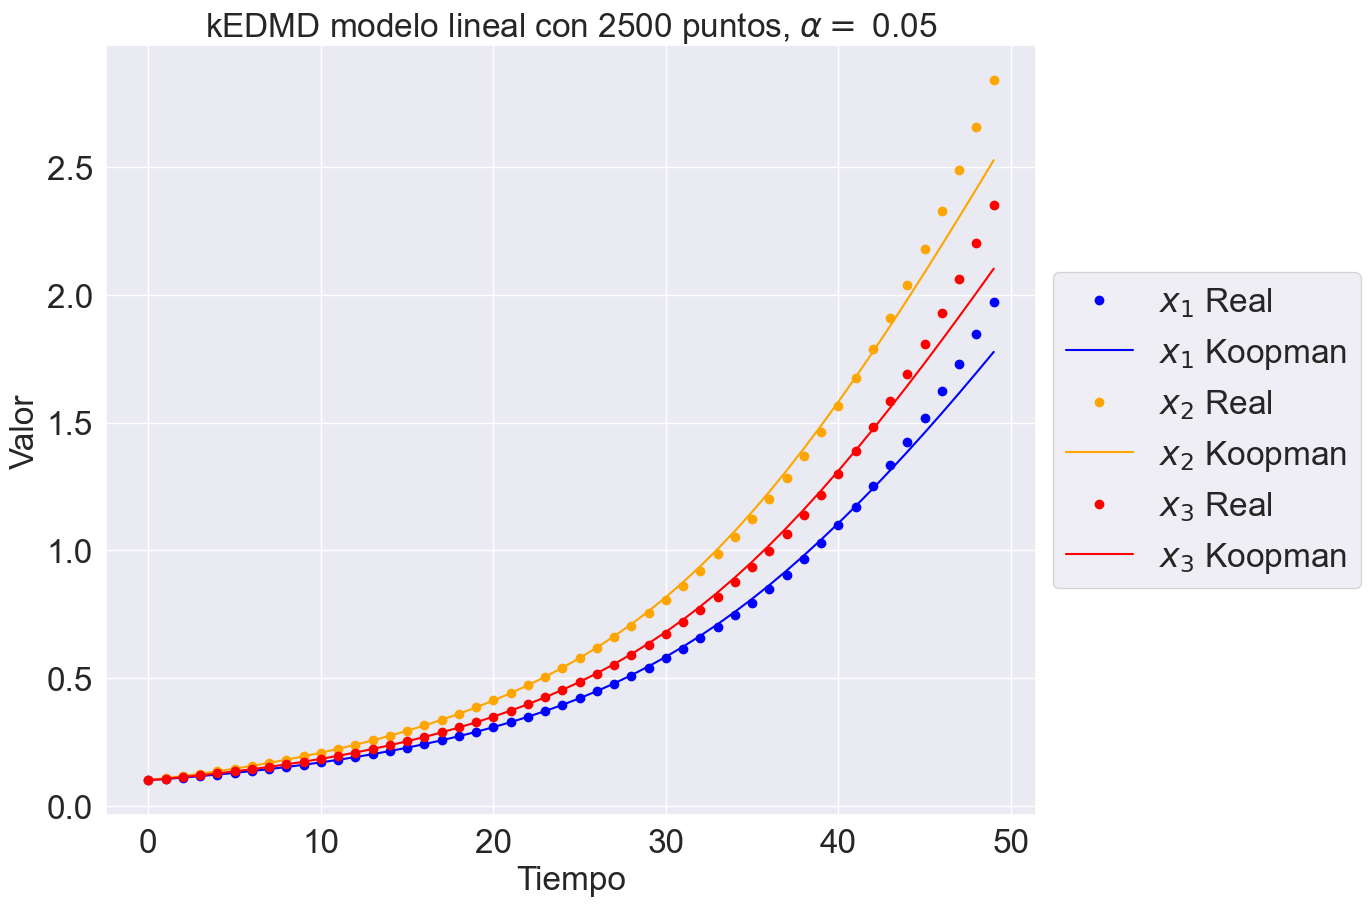

In [40]:
# Kernel
k = Matern(length_scale=1e3, nu=0.5)

# Alpha
alpha = 0.05

# Predicción
x, x_koop, A, U = compute_linear_kedmd(alpha, N)

# Gráfico
fig = plt.figure()

plt.plot(t, x[:, 0], 'o', label=r"$x_1$ Real", c='blue')
plt.plot(t, x_koop[:, 0], label=r"$x_1$ Koopman", c='blue')

plt.plot(t, x[:, 1], 'o', label=r"$x_2$ Real", c='orange')
plt.plot(t, x_koop[:, 1], label=r"$x_2$ Koopman", c='orange')

plt.plot(t, x[:, 2], 'o', label=r"$x_3$ Real", c='red')
plt.plot(t, x_koop[:, 2], label=r"$x_3$ Koopman", c='red')

plt.xlabel("Tiempo")
plt.ylabel("Valor")

# Leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(r"kEDMD modelo lineal con {} puntos, $\alpha = $ {}".format(N, alpha))
fig.savefig(img_path+"Linear3.pdf", bbox_inches='tight')

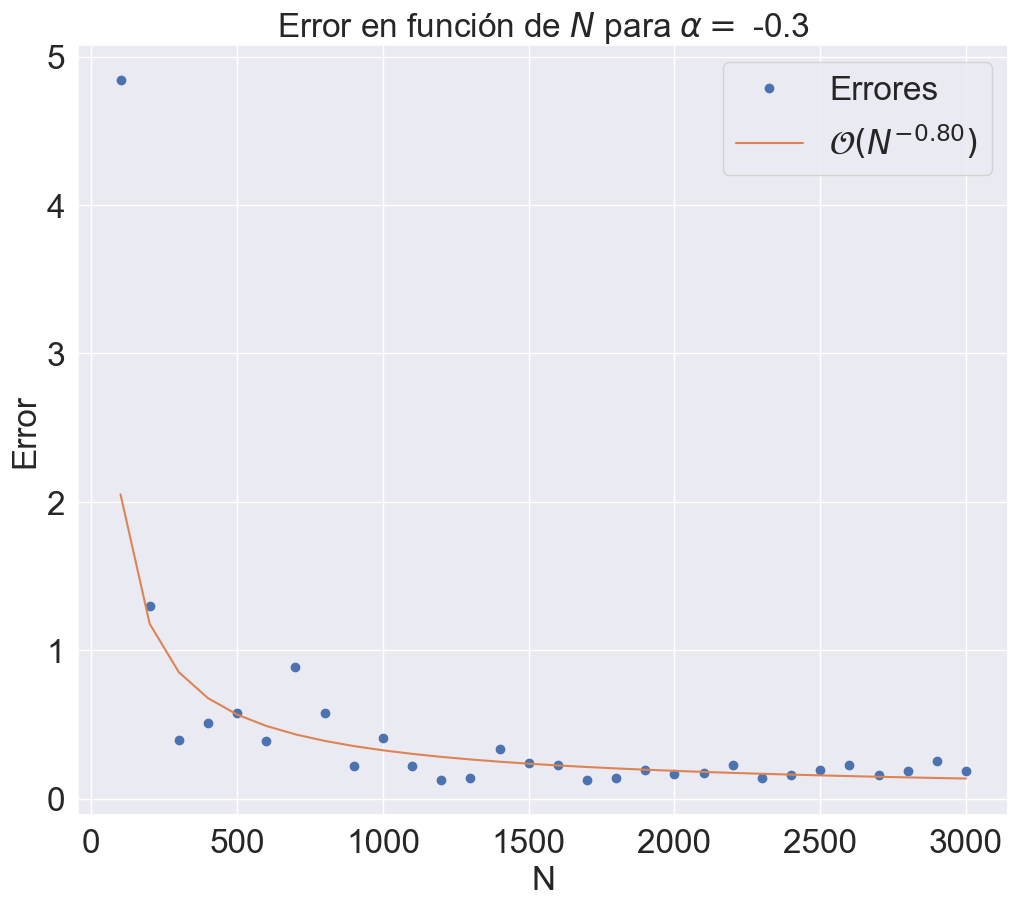

In [41]:
# Alpha a utilizar
alpha = -0.3

# Número de puntos
Ns = np.arange(100, 3100, 100)

# Errores
errors = np.zeros(len(Ns))

# Cálculo de errores
for i in range(len(Ns)):
    x, x_koop, _, _ = compute_linear_kedmd(alpha, Ns[i])
    errors[i] = np.linalg.norm(x - x_koop)

# Ajustar una curva como raíz cuadrada a los errores
fit = np.polyfit(np.log(Ns), np.log(errors), 1)

# Gráfico
fig = plt.figure()

plt.plot(Ns, errors, 'o', label="Errores")
plt.plot(Ns, np.exp(fit[1])*Ns**fit[0], label=r'$\mathcal{O}(N^{%.2f})$' % fit[0])

plt.xlabel("N")
plt.ylabel("Error")

plt.legend()
plt.title(r"Error en función de $N$ para $\alpha = $ {}".format(alpha))
fig.savefig(img_path+"Linear1Errors.pdf", bbox_inches='tight')

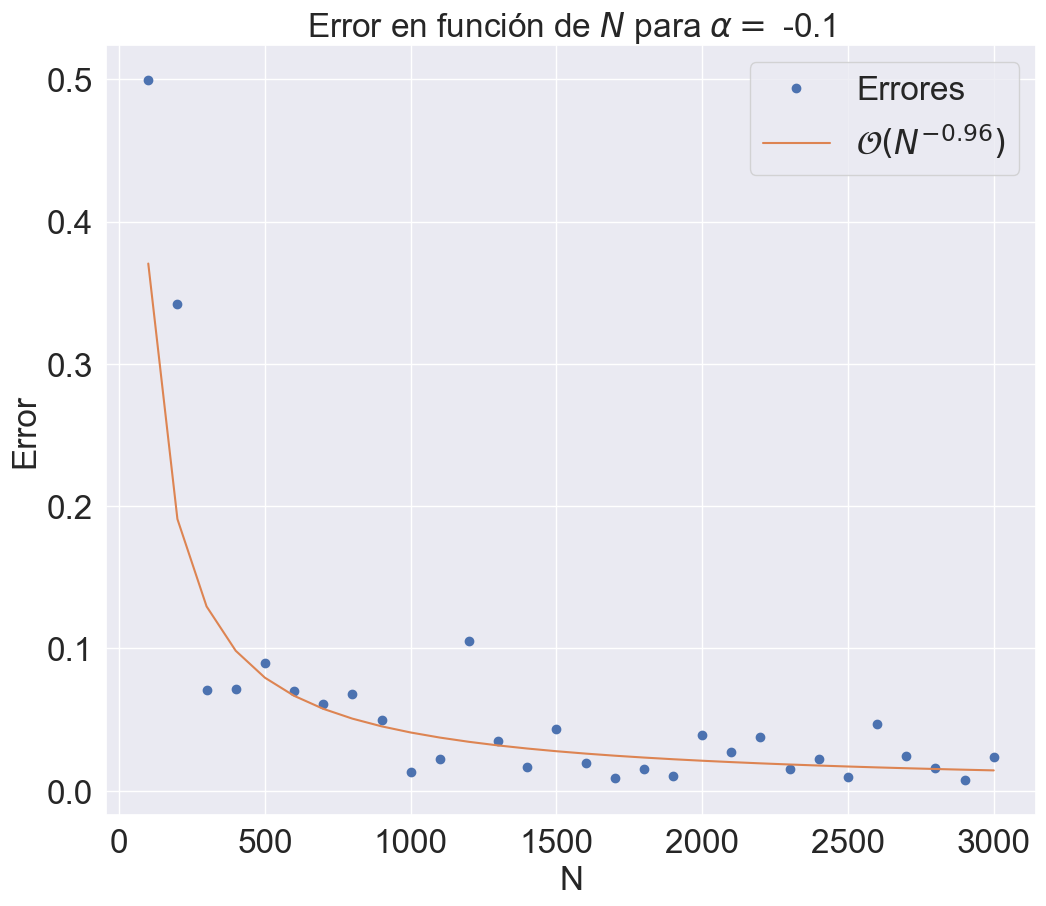

In [42]:
# Alpha a utilizar
alpha = -0.1

# Número de puntos
Ns = np.arange(100, 3100, 100)

# Errores
errors = np.zeros(len(Ns))

# Cálculo de errores
for i in range(len(Ns)):
    x, x_koop, _, _  = compute_linear_kedmd(alpha, Ns[i])
    errors[i] = np.linalg.norm(x - x_koop)

# Ajustar una curva como raíz cuadrada a los errores
fit = np.polyfit(np.log(Ns), np.log(errors), 1)

# Gráfico
fig = plt.figure()

plt.plot(Ns, errors, 'o', label="Errores")
plt.plot(Ns, np.exp(fit[1])*Ns**fit[0], label=r'$\mathcal{O}(N^{%.2f})$' % fit[0])

plt.xlabel("N")
plt.ylabel("Error")

plt.legend()
plt.title(r"Error en función de $N$ para $\alpha = $ {}".format(alpha))
fig.savefig(img_path+"Linear2Errors.pdf", bbox_inches='tight')

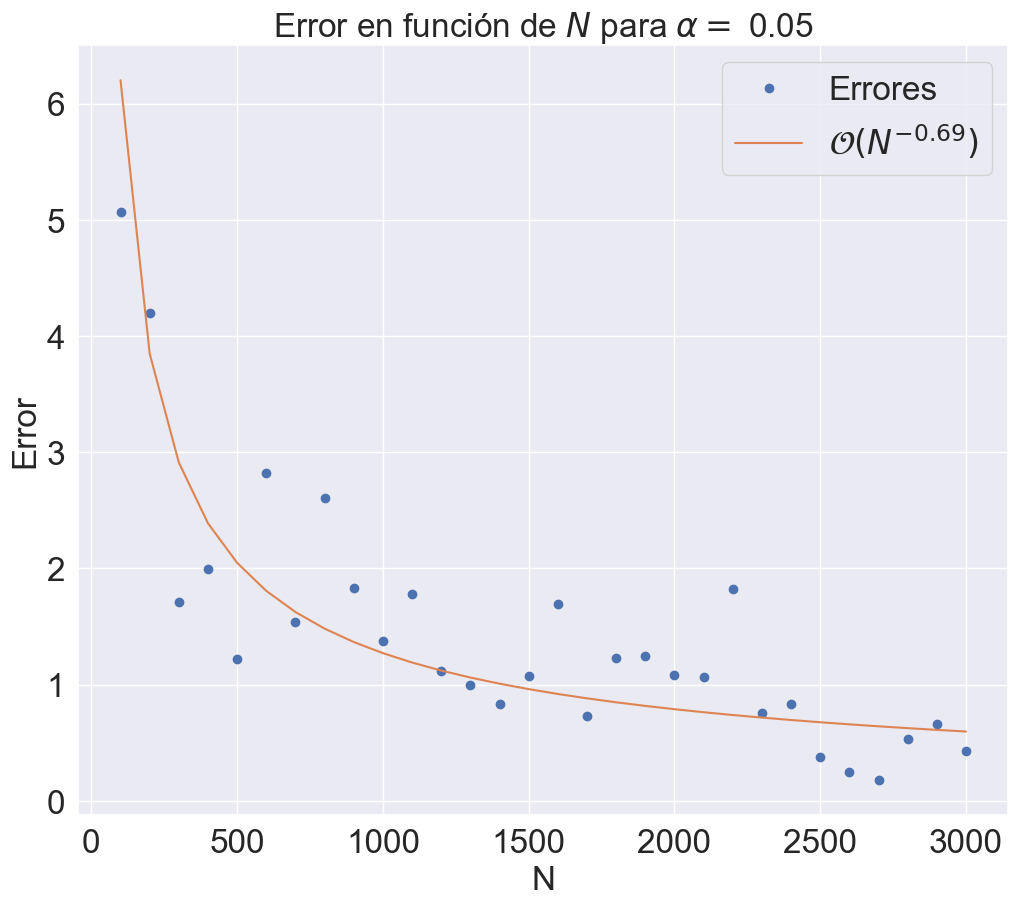

In [43]:
# Alpha a utilizar
alpha = 0.05

# Número de puntos
Ns = np.arange(100, 3100, 100)

# Errores
errors = np.zeros(len(Ns))

# Cálculo de errores
for i in range(len(Ns)):
    x, x_koop, _, _  = compute_linear_kedmd(alpha, Ns[i])
    errors[i] = np.linalg.norm(x - x_koop)

# Ajustar una curva como raíz cuadrada a los errores
fit = np.polyfit(np.log(Ns), np.log(errors), 1)

# Gráfico
fig = plt.figure()

plt.plot(Ns, errors, 'o', label="Errores")
plt.plot(Ns, np.exp(fit[1])*Ns**fit[0], label=r'$\mathcal{O}(N^{%.2f})$' % fit[0])

plt.xlabel("N")
plt.ylabel("Error")

plt.legend()
plt.title(r"Error en función de $N$ para $\alpha = $ {}".format(alpha))
fig.savefig(img_path+"Linear3Errors.pdf", bbox_inches='tight')

### **Visualizando la distribución Dirichlet**

In [44]:
# Distintos casos de distribución Dirichlet
N_samples = 1000

# Distribuciones
dirichlet1 = stats.dirichlet(alpha=[1, 1, 1])
dirichlet2 = stats.dirichlet(alpha=[3, 3, 3])
dirichlet3 = stats.dirichlet(alpha=[1, 2, 3])

# Muestras
samples1 = dirichlet1.rvs(N_samples)
samples2 = dirichlet2.rvs(N_samples)
samples3 = dirichlet3.rvs(N_samples)

# Gráfico en 3D
fig = make_subplots(
    rows=1, 
    cols=3, 
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=['Dirichlet (1, 1, 1)', 'Dirichlet (3, 3, 3)', 'Dirichlet (1, 2, 3)']
)
# Gráfico 1
fig.add_trace(go.Scatter3d(
    x=samples1[:,0], y=samples1[:,1], z=samples1[:,2],
    mode='markers', marker=dict(size=3), name='Dirichlet (1, 1, 1)'
), row=1, col=1)

# Gráfico 2
fig.add_trace(go.Scatter3d(
    x=samples2[:,0], y=samples2[:,1], z=samples2[:,2],
    mode='markers', marker=dict(size=3), name='Dirichlet (3, 3, 3)'
), row=1, col=2)

# Gráfico 3
fig.add_trace(go.Scatter3d(
    x=samples3[:,0], y=samples3[:,1], z=samples3[:,2],
    mode='markers', marker=dict(size=3), name='Dirichlet (1, 2, 3)'
), row=1, col=3)

# Colocar titulo
fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),
    height=400,
    width=1400
    )

# Límites de los ejes
fig.update_scenes(
    xaxis = dict(range=[0, 1]),
    yaxis = dict(range=[0, 1]),
    zaxis = dict(range=[0, 1])
)

# No mostrar la leyenda
fig.update_layout(showlegend=False)

fig.write_image(img_path+"Dirichlet.pdf")
fig.show()

### **kEDMD para modelo SIR**

In [45]:
# Observaciones del sistema, irrelevantes para este ejemplo
def g(x):
    return x

# Dimensiones y el kernel
N = 1000
nx, ny = 3, 3
k = Matern(length_scale=1, nu=0.5)

# Distribuciones
X_dist = stats.dirichlet(alpha=1*np.ones(nx))
dyn_dist = stats.multivariate_normal(mean=np.zeros(nx), cov=1e-7*np.eye(nx))
obs_dist = stats.multivariate_normal(mean=np.zeros(ny), cov=1e-7*np.eye(ny))

# Datos sintéticos
iters = 20
x0 = np.array([0.9, 0.1, 0.0])

In [46]:
# Función para calcular kEDMD en el modelo SIR
def kEDMD_SIR(beta, gamma, N):
    # Función de dinámica
    f = lambda x: x + np.array([
        -beta*x[0]*x[1],
        beta*x[0]*x[1] - gamma*x[1],
        gamma*x[1]
    ])

    # Solución real
    x = np.zeros((iters, nx))
    x[0] = x0

    for i in range(1, iters):
        x[i] = f(x[i-1])

    # Sistema dinámico
    dyn = DynamicalSystem(nx, ny, f, g, X_dist, dyn_dist, obs_dist, discrete_time=True)

    # Operador de Koopman
    Koop = KoopmanOperator(k, dyn)

    # Se calcula kEDMD
    Koop.compute_edmd(N)
    U, B, phi = Koop.U, Koop.B, Koop.phi

    # Sistema con Koopman
    x_koop = np.zeros((iters, nx))
    x_koop[0] = B@phi(x0)
    z = np.zeros((iters, N))
    z[0] = phi(x0)

    for i in range(1, iters):
        z[i] = U@z[i-1]
        x_koop[i] = B@z[i]

    return x, x_koop

In [47]:
# Parámetros
beta1, gamma1 = 1, 0.3
beta2, gamma2 = 0.5, 0.1
beta3, gamma3 = 1.5, 0.6

# Predicción
x1, x_koop1 = kEDMD_SIR(beta1, gamma1, N)
x2, x_koop2 = kEDMD_SIR(beta2, gamma2, N)
x3, x_koop3 = kEDMD_SIR(beta3, gamma3, N)

# Tiempo 
t = np.arange(iters)

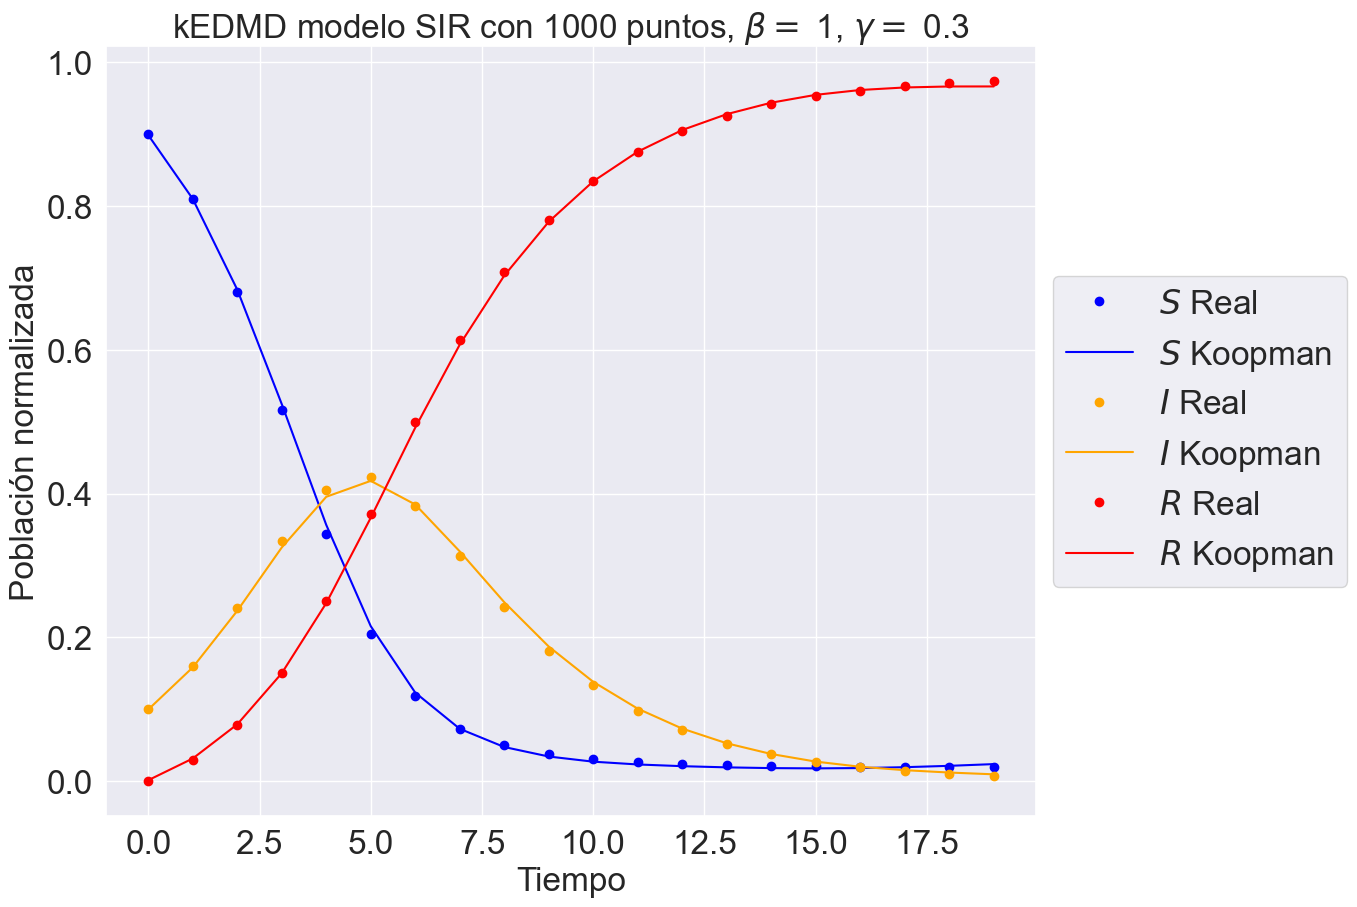

In [48]:
# Gráfico
fig = plt.figure()

plt.plot(t, x1[:, 0], 'o', label=r"$S$ Real", c='blue')
plt.plot(t, x_koop1[:, 0], label=r"$S$ Koopman", c='blue')

plt.plot(t, x1[:, 1], 'o', label=r"$I$ Real", c='orange')
plt.plot(t, x_koop1[:, 1], label=r"$I$ Koopman", c='orange')

plt.plot(t, x1[:, 2], 'o', label=r"$R$ Real", c='red')
plt.plot(t, x_koop1[:, 2], label=r"$R$ Koopman", c='red')

plt.xlabel("Tiempo")
plt.ylabel("Población normalizada")

# Leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(r"kEDMD modelo SIR con {} puntos, $\beta = $ {}, $\gamma = $ {}".format(N, beta1, gamma1))
plt.savefig(img_path+"SIR1.pdf", bbox_inches='tight')

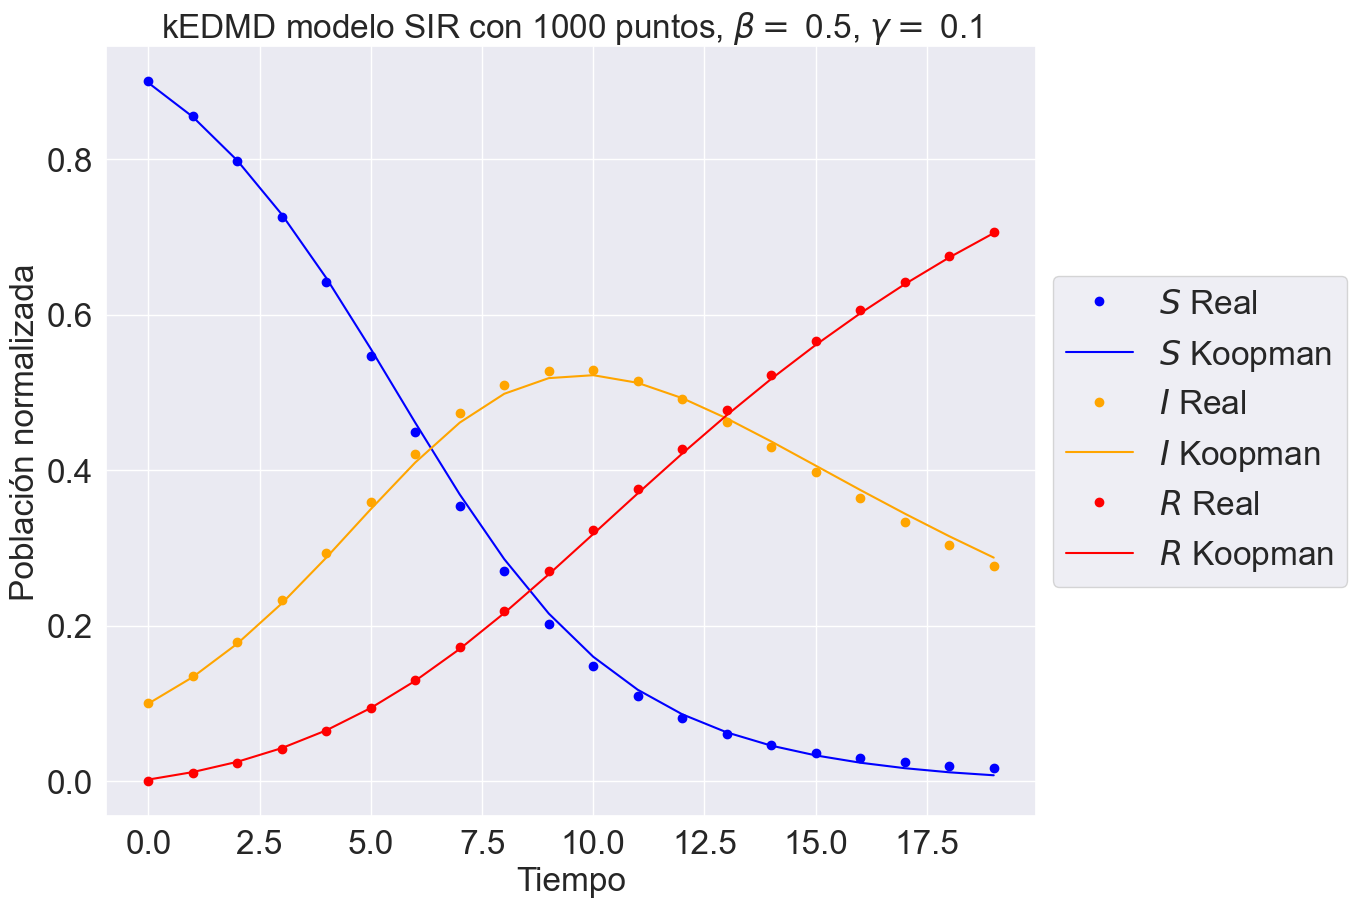

In [49]:
# Gráfico
fig = plt.figure()

plt.plot(t, x2[:, 0], 'o', label=r"$S$ Real", c='blue')
plt.plot(t, x_koop2[:, 0], label=r"$S$ Koopman", c='blue')

plt.plot(t, x2[:, 1], 'o', label=r"$I$ Real", c='orange')
plt.plot(t, x_koop2[:, 1], label=r"$I$ Koopman", c='orange')

plt.plot(t, x2[:, 2], 'o', label=r"$R$ Real", c='red')
plt.plot(t, x_koop2[:, 2], label=r"$R$ Koopman", c='red')

plt.xlabel("Tiempo")
plt.ylabel("Población normalizada")

# Leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(r"kEDMD modelo SIR con {} puntos, $\beta = $ {}, $\gamma = $ {}".format(N, beta2, gamma2))
plt.savefig(img_path+"SIR2.pdf", bbox_inches='tight')

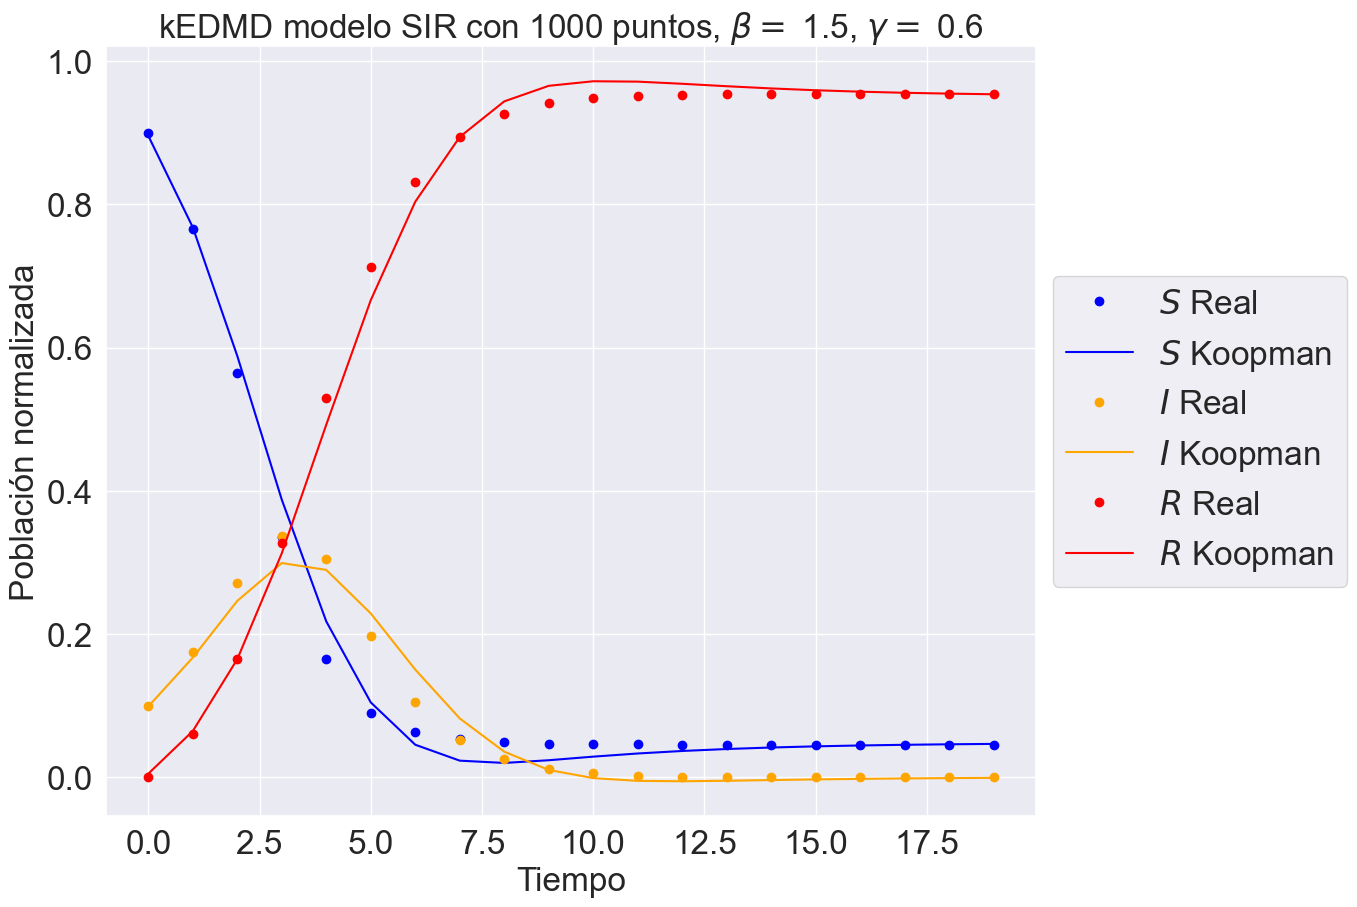

In [50]:
# Gráfico
fig = plt.figure()

plt.plot(t, x3[:, 0], 'o', label=r"$S$ Real", c='blue')
plt.plot(t, x_koop3[:, 0], label=r"$S$ Koopman", c='blue')

plt.plot(t, x3[:, 1], 'o', label=r"$I$ Real", c='orange')
plt.plot(t, x_koop3[:, 1], label=r"$I$ Koopman", c='orange')

plt.plot(t, x3[:, 2], 'o', label=r"$R$ Real", c='red')
plt.plot(t, x_koop3[:, 2], label=r"$R$ Koopman", c='red')

plt.xlabel("Tiempo")
plt.ylabel("Población normalizada")

# Leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(r"kEDMD modelo SIR con {} puntos, $\beta = $ {}, $\gamma = $ {}".format(N, beta3, gamma3))
plt.savefig(img_path+"SIR3.pdf", bbox_inches='tight')

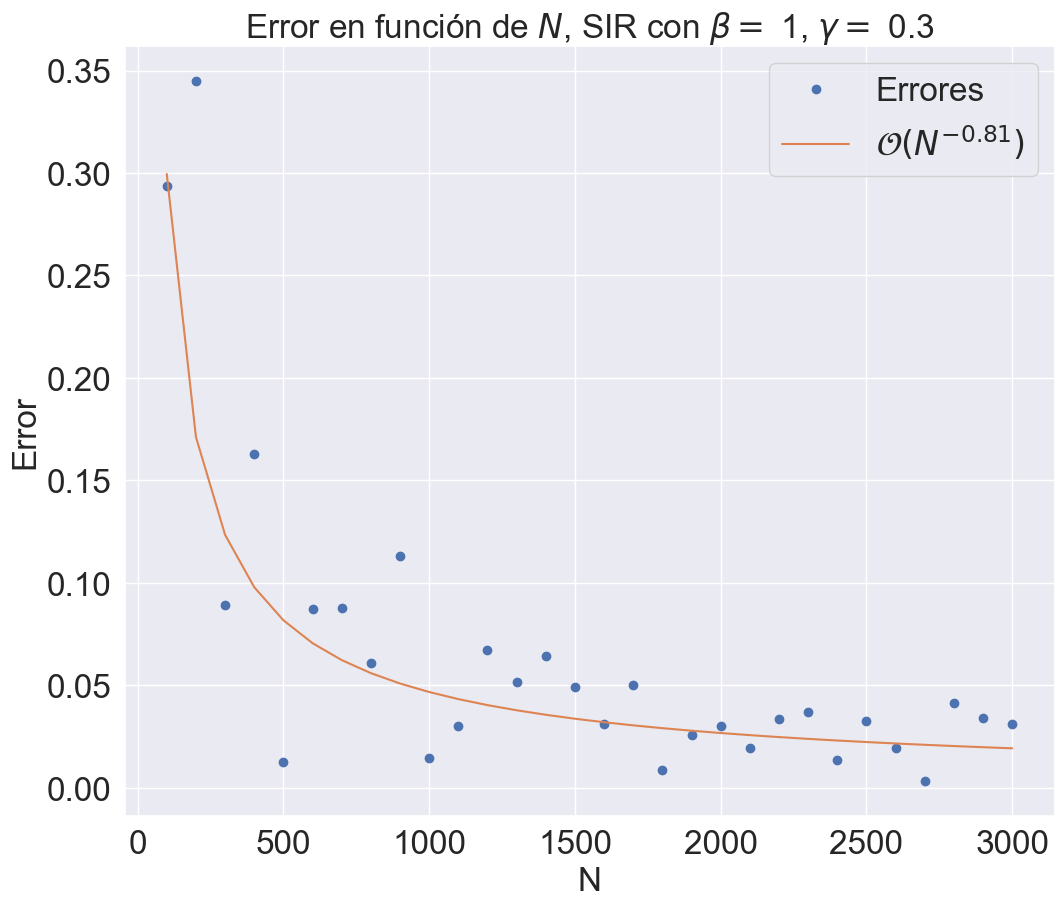

In [51]:
# Parámetros a utilizar
beta, gamma = beta1, gamma1

# Número de puntos
Ns = np.arange(100, 3100, 100)

# Errores
errors = np.zeros(len(Ns))

# Cálculo de errores
for i in range(len(Ns)):
    x, x_koop = kEDMD_SIR(beta, gamma, Ns[i])
    errors[i] = np.linalg.norm(x - x_koop)

# Ajustar una curva como raíz cuadrada a los errores
fit = np.polyfit(np.log(Ns), np.log(errors), 1)

# Gráfico
fig = plt.figure()

plt.plot(Ns, errors, 'o', label="Errores")
plt.plot(Ns, np.exp(fit[1])*Ns**fit[0], label=r'$\mathcal{O}(N^{%.2f})$' % fit[0])

plt.xlabel("N")
plt.ylabel("Error")

plt.legend()
plt.title(r"Error en función de $N$, SIR con $\beta = $ {}, $\gamma = $ {}".format(beta1, gamma1))
plt.savefig(img_path+"SIR1Errors.pdf", bbox_inches='tight')

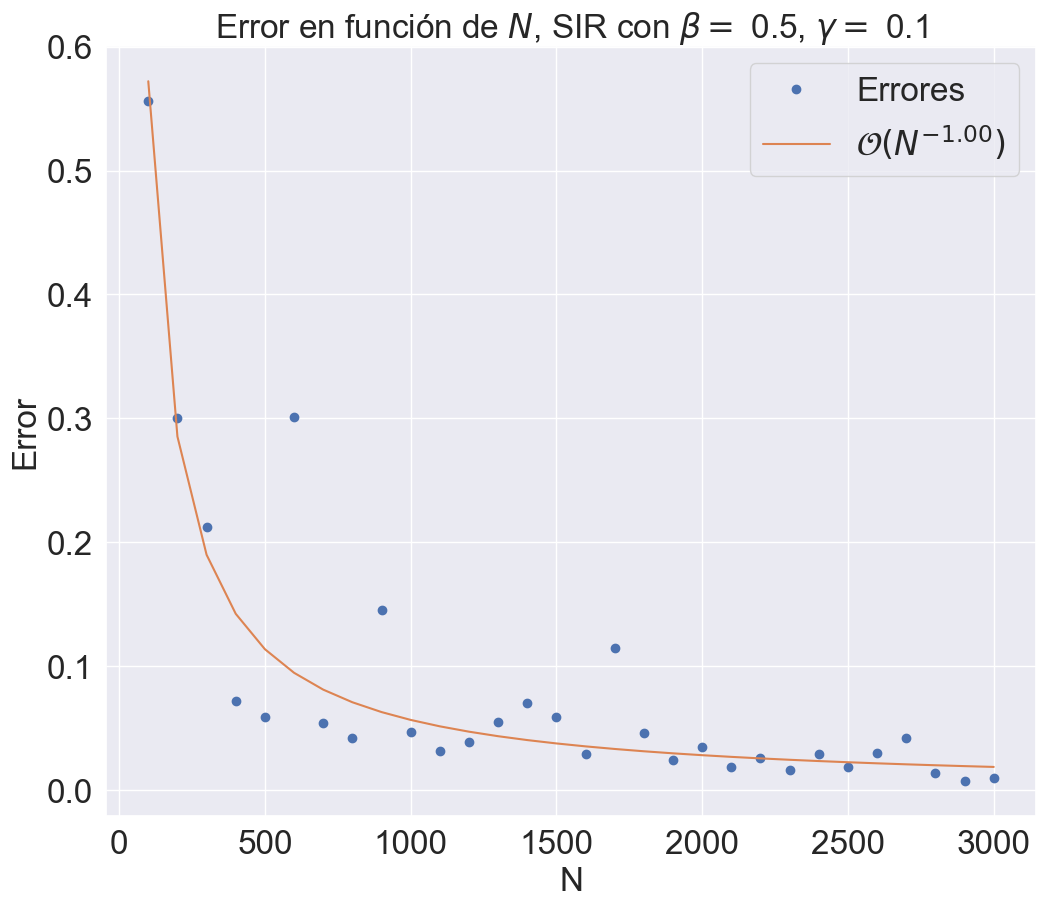

In [52]:
# Parámetros a utilizar
beta, gamma = beta2, gamma2

# Número de puntos
Ns = np.arange(100, 3100, 100)

# Errores
errors = np.zeros(len(Ns))

# Cálculo de errores
for i in range(len(Ns)):
    x, x_koop = kEDMD_SIR(beta, gamma, Ns[i])
    errors[i] = np.linalg.norm(x - x_koop)

# Ajustar una curva como raíz cuadrada a los errores
fit = np.polyfit(np.log(Ns), np.log(errors), 1)

# Gráfico
fig = plt.figure()

plt.plot(Ns, errors, 'o', label="Errores")
plt.plot(Ns, np.exp(fit[1])*Ns**fit[0], label=r'$\mathcal{O}(N^{%.2f})$' % fit[0])

plt.xlabel("N")
plt.ylabel("Error")

plt.legend()
plt.title(r"Error en función de $N$, SIR con $\beta = $ {}, $\gamma = $ {}".format(beta2, gamma2))
plt.savefig(img_path+"SIR2Errors.pdf", bbox_inches='tight')

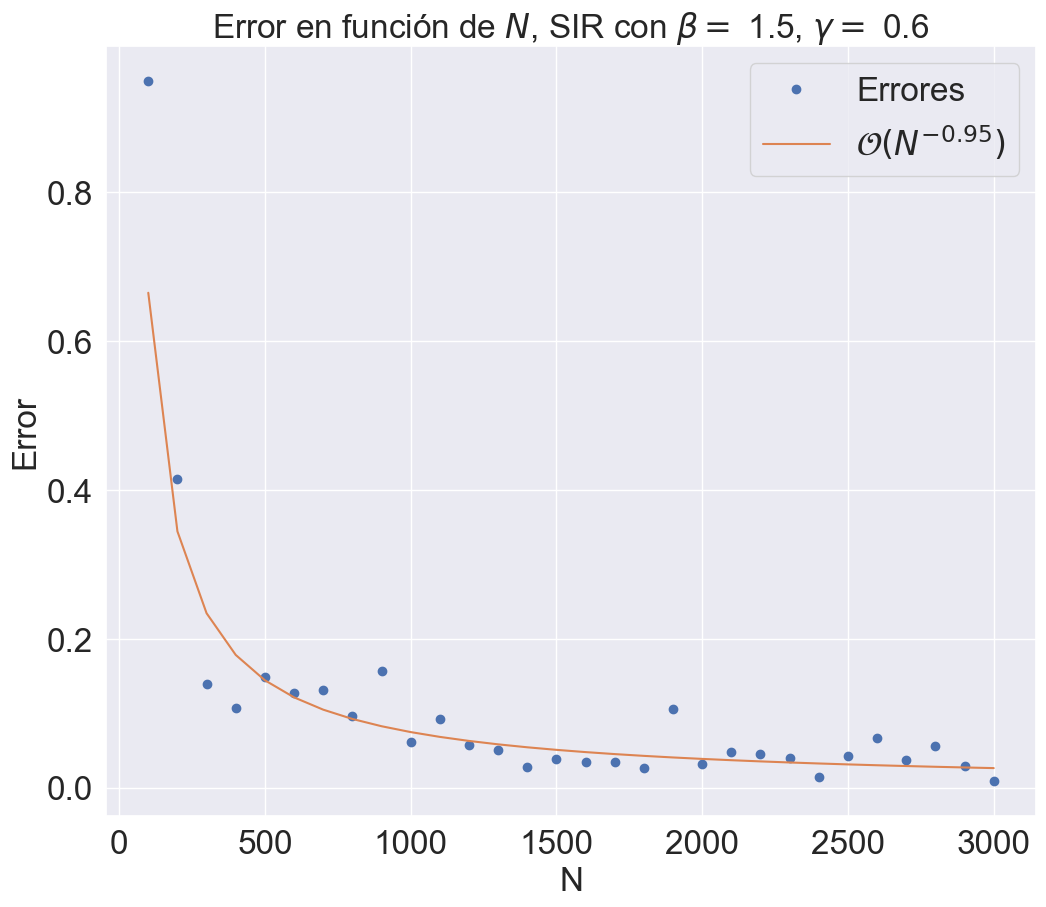

In [53]:
# Parámetros a utilizar
beta, gamma = beta3, gamma3

# Número de puntos
Ns = np.arange(100, 3100, 100)

# Errores
errors = np.zeros(len(Ns))

# Cálculo de errores
for i in range(len(Ns)):
    x, x_koop = kEDMD_SIR(beta, gamma, Ns[i])
    errors[i] = np.linalg.norm(x - x_koop)

# Ajustar una curva como raíz cuadrada a los errores
fit = np.polyfit(np.log(Ns), np.log(errors), 1)

# Gráfico
fig = plt.figure()

plt.plot(Ns, errors, 'o', label="Errores")
plt.plot(Ns, np.exp(fit[1])*Ns**fit[0], label=r'$\mathcal{O}(N^{%.2f})$' % fit[0])

plt.xlabel("N")
plt.ylabel("Error")

plt.legend()
plt.title(r"Error en función de $N$, SIR con $\beta = $ {}, $\gamma = $ {}".format(beta3, gamma3))
plt.savefig(img_path+"SIR3Errors.pdf", bbox_inches='tight')

### **kEDMD para modelo SIRS**

In [54]:
# Observaciones del sistema, irrelevantes para este ejemplo
def g(x):
    return x

# Dimensiones y el kernel
N = 1000
nx, ny = 3, 3
k = Matern(length_scale=1e3, nu=0.5)

# Distribuciones
X_dist = stats.dirichlet(alpha=1*np.ones(nx))
dyn_dist = stats.multivariate_normal(mean=np.zeros(nx), cov=1e-7*np.eye(nx))
obs_dist = stats.multivariate_normal(mean=np.zeros(ny), cov=1e-7*np.eye(ny))


# Datos sintéticos
iters = 50
x0 = np.array([0.9, 0.1, 0.0])

In [55]:
# Función para calcular kEDMD en el modelo SIRS
def kEDMD_SIRS(alpha, beta, gamma, N):
    # Función de dinámica
    f = lambda x: x + np.array([
        -beta*x[0]*x[1] + alpha*x[2],
        beta*x[0]*x[1] - gamma*x[1],
        gamma*x[1] - alpha*x[2]
    ])

    # Solución real
    x = np.zeros((iters, nx))
    x[0] = x0

    for i in range(1, iters):
        x[i] = f(x[i-1])

    # Sistema dinámico
    dyn = DynamicalSystem(nx, ny, f, g, X_dist, dyn_dist, obs_dist, discrete_time=True)

    # Operador de Koopman
    Koop = KoopmanOperator(k, dyn)

    # Se calcula kEDMD
    Koop.compute_edmd(N)
    U, B, phi = Koop.U, Koop.B, Koop.phi

    # Sistema con Koopman
    x_koop = np.zeros((iters, nx))
    x_koop[0] = B@phi(x0)
    z = np.zeros((iters, N))
    z[0] = phi(x0)

    for i in range(1, iters):
        z[i] = U@z[i-1]
        x_koop[i] = B@z[i]

    return x, x_koop

In [56]:
# Parámetros
alpha1, beta1, gamma1 = 0.1, 1, 0.3
alpha2, beta2, gamma2 = 0.3, 0.5, 0.1
alpha3, beta3, gamma3 = 0.5, 1.5, 0.6

# Predicción
x1, x_koop1 = kEDMD_SIRS(alpha1, beta1, gamma1, N)
x2, x_koop2 = kEDMD_SIRS(alpha2, beta2, gamma2, N)
x3, x_koop3 = kEDMD_SIRS(alpha3, beta3, gamma3, N)

# Tiempo
t = np.arange(iters)

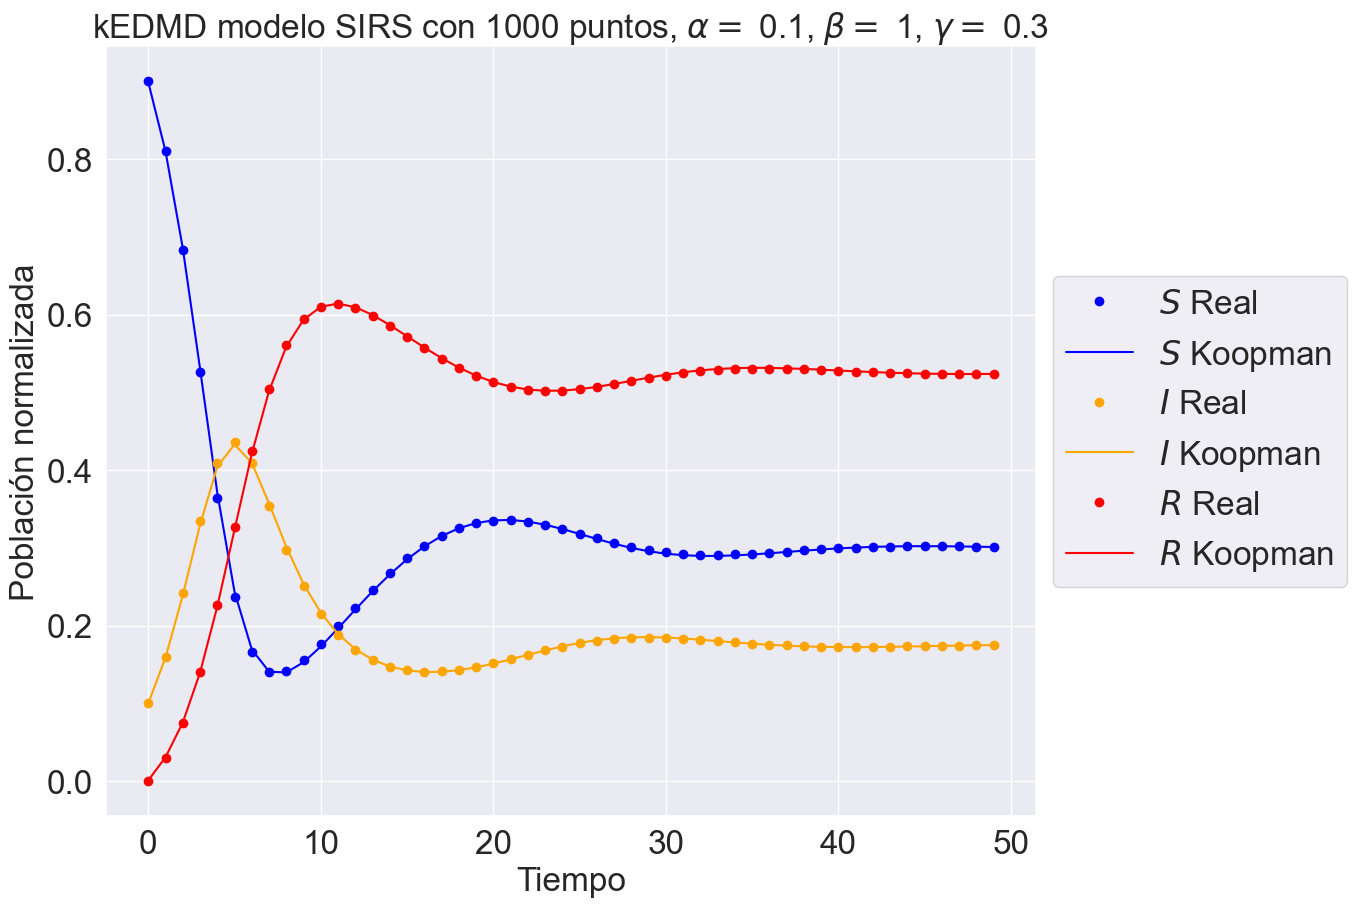

In [57]:
# Gráfico
fig = plt.figure()

plt.plot(t, x1[:, 0], 'o', label=r"$S$ Real", c='blue')
plt.plot(t, x_koop1[:, 0], label=r"$S$ Koopman", c='blue')

plt.plot(t, x1[:, 1], 'o', label=r"$I$ Real", c='orange')
plt.plot(t, x_koop1[:, 1], label=r"$I$ Koopman", c='orange')

plt.plot(t, x1[:, 2], 'o', label=r"$R$ Real", c='red')
plt.plot(t, x_koop1[:, 2], label=r"$R$ Koopman", c='red')

plt.xlabel("Tiempo")
plt.ylabel("Población normalizada")

# Leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(r"kEDMD modelo SIRS con {} puntos, $\alpha = $ {}, $\beta = $ {}, $\gamma = $ {}".format(N, alpha1, beta1, gamma1))
plt.savefig(img_path+"SIRS1.pdf", bbox_inches='tight')         

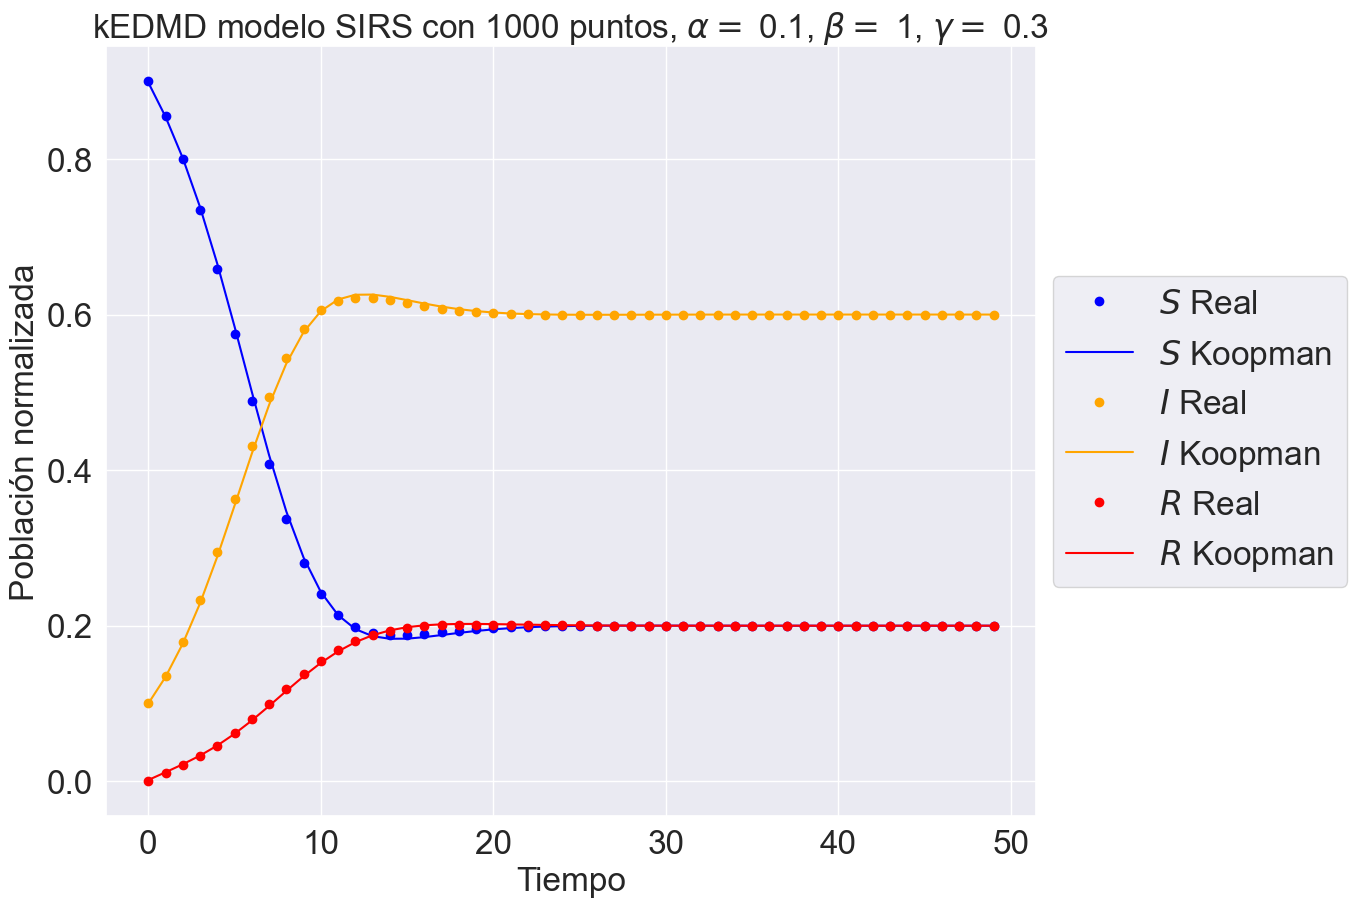

In [58]:
# Gráfico
fig = plt.figure()

plt.plot(t, x2[:, 0], 'o', label=r"$S$ Real", c='blue')
plt.plot(t, x_koop2[:, 0], label=r"$S$ Koopman", c='blue')

plt.plot(t, x2[:, 1], 'o', label=r"$I$ Real", c='orange')
plt.plot(t, x_koop2[:, 1], label=r"$I$ Koopman", c='orange')

plt.plot(t, x2[:, 2], 'o', label=r"$R$ Real", c='red')
plt.plot(t, x_koop2[:, 2], label=r"$R$ Koopman", c='red')

plt.xlabel("Tiempo")
plt.ylabel("Población normalizada")

# Leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(r"kEDMD modelo SIRS con {} puntos, $\alpha = $ {}, $\beta = $ {}, $\gamma = $ {}".format(N, alpha1, beta1, gamma1))
plt.savefig(img_path+"SIRS2.pdf", bbox_inches='tight')         

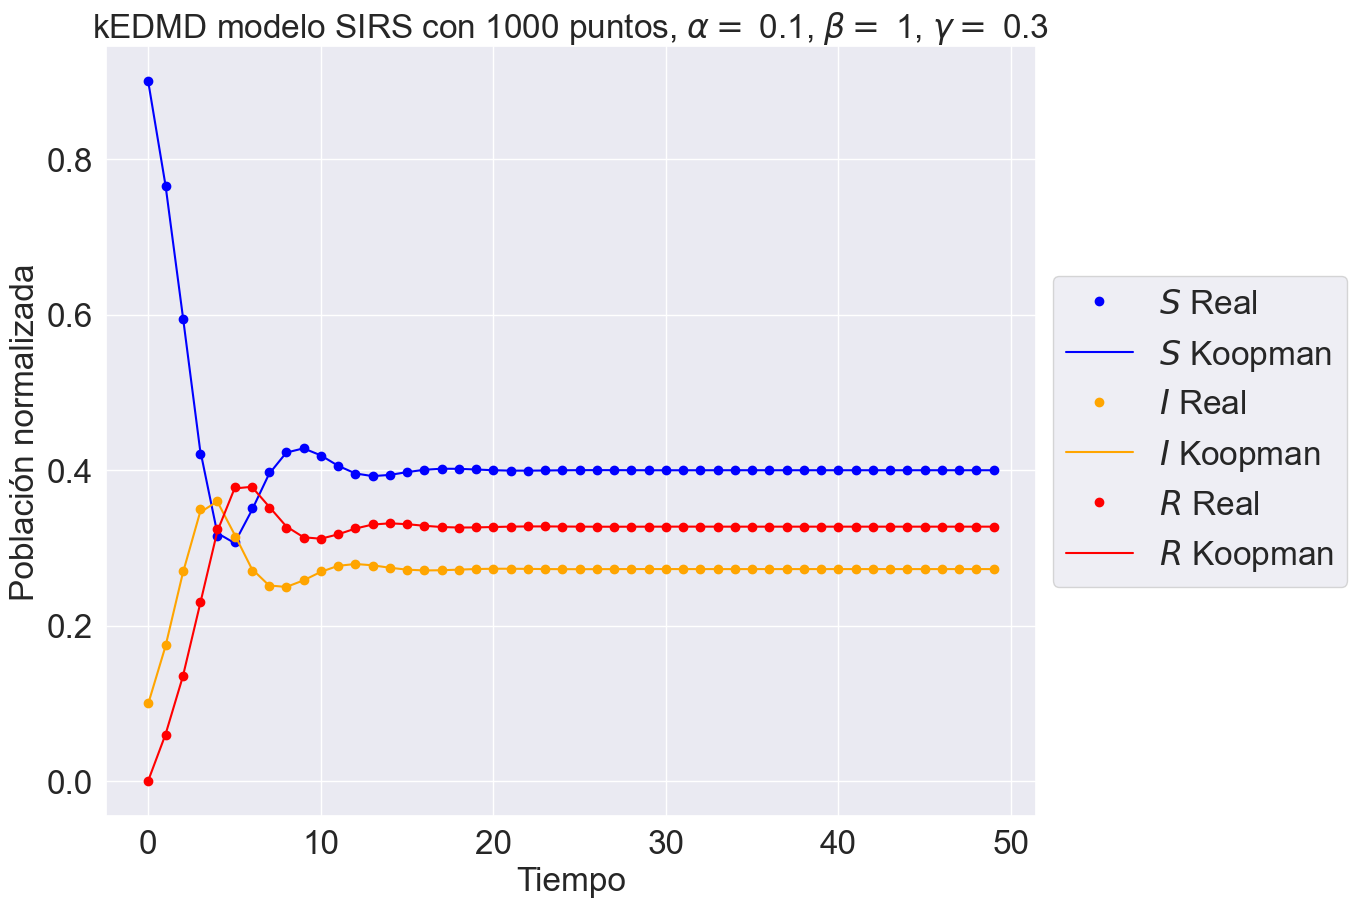

In [59]:
# Gráfico
fig = plt.figure()

plt.plot(t, x3[:, 0], 'o', label=r"$S$ Real", c='blue')
plt.plot(t, x_koop3[:, 0], label=r"$S$ Koopman", c='blue')

plt.plot(t, x3[:, 1], 'o', label=r"$I$ Real", c='orange')
plt.plot(t, x_koop3[:, 1], label=r"$I$ Koopman", c='orange')

plt.plot(t, x3[:, 2], 'o', label=r"$R$ Real", c='red')
plt.plot(t, x_koop3[:, 2], label=r"$R$ Koopman", c='red')

plt.xlabel("Tiempo")
plt.ylabel("Población normalizada")

# Leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(r"kEDMD modelo SIRS con {} puntos, $\alpha = $ {}, $\beta = $ {}, $\gamma = $ {}".format(N, alpha1, beta1, gamma1))
plt.savefig(img_path+"SIRS3.pdf", bbox_inches='tight')         

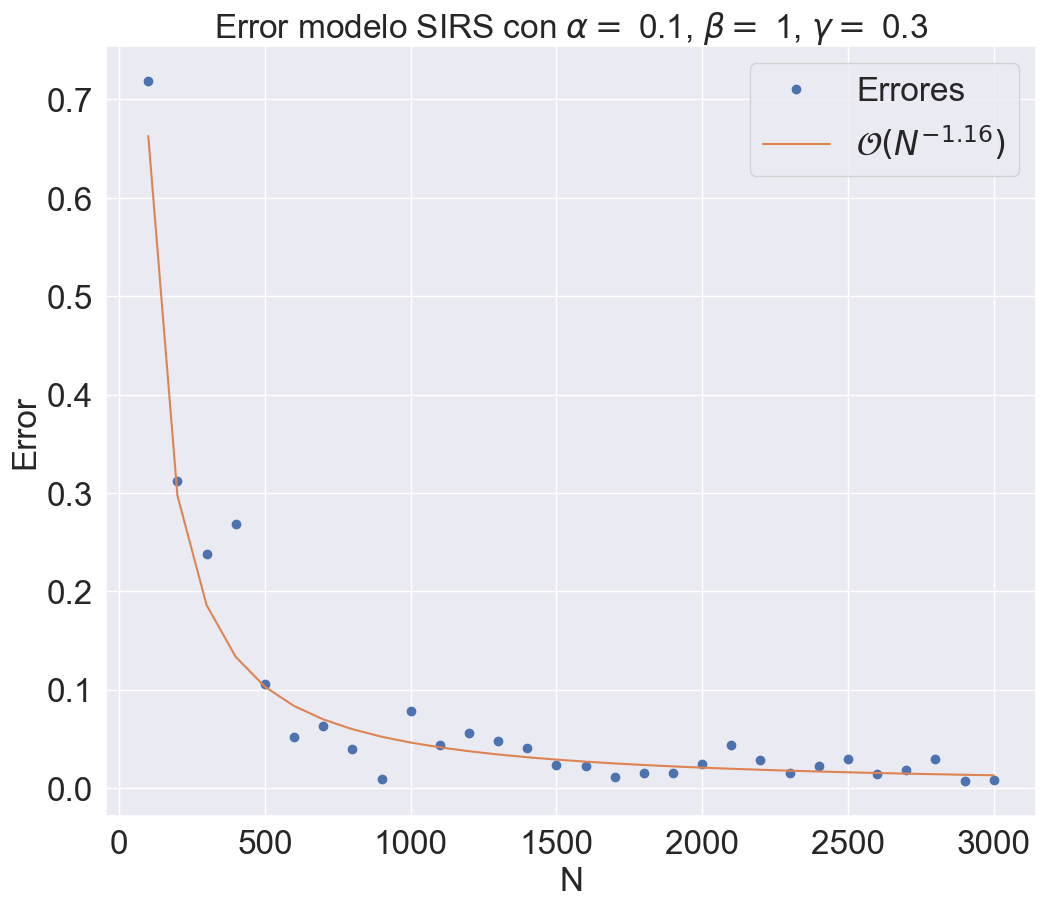

In [60]:
# Parámetros a utilizar
alpha, beta, gamma = alpha1, beta1, gamma1

# Número de puntos
Ns = np.arange(100, 3100, 100)

# Errores
errors = np.zeros(len(Ns))

# Cálculo de errores
for i in range(len(Ns)):
    x, x_koop = kEDMD_SIRS(alpha, beta, gamma, Ns[i])
    errors[i] = np.linalg.norm(x - x_koop)

# Ajustar una curva como raíz cuadrada a los errores
fit = np.polyfit(np.log(Ns), np.log(errors), 1)

# Gráfico
fig = plt.figure()

plt.plot(Ns, errors, 'o', label="Errores")
plt.plot(Ns, np.exp(fit[1])*Ns**fit[0], label=r'$\mathcal{O}(N^{%.2f})$' % fit[0])

plt.xlabel("N")
plt.ylabel("Error")

plt.legend()
plt.title(r"Error modelo SIRS con $\alpha = $ {}, $\beta = $ {}, $\gamma = $ {}".format(alpha1, beta1, gamma1))
plt.savefig(img_path+"SIRS1Errors.pdf", bbox_inches='tight')

/Users/diegoolguin/anaconda3/envs/thesis/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:

The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.

/Users/diegoolguin/anaconda3/envs/thesis/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:

The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.



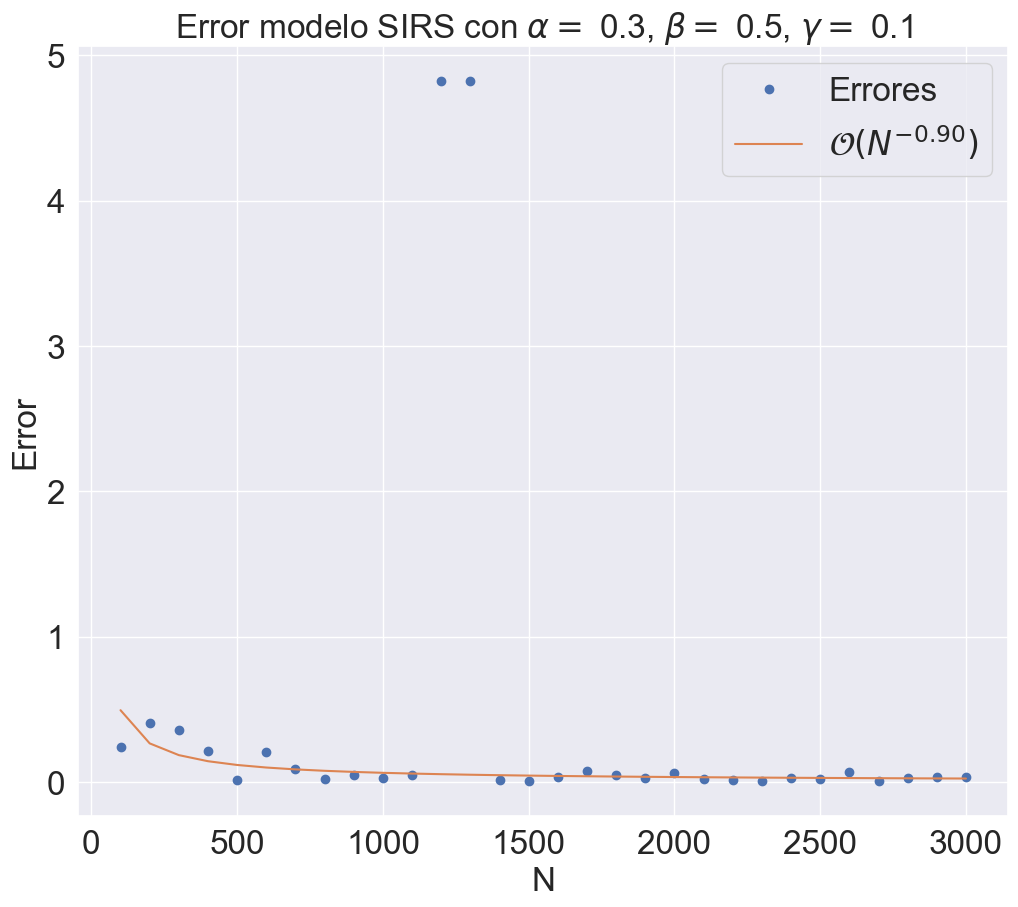

In [61]:
# Parámetros a utilizar
alpha, beta, gamma = alpha2, beta2, gamma2

# Número de puntos
Ns = np.arange(100, 3100, 100)

# Errores
errors = np.zeros(len(Ns))

# Cálculo de errores
for i in range(len(Ns)):
    x, x_koop = kEDMD_SIRS(alpha, beta, gamma, Ns[i])
    errors[i] = np.linalg.norm(x - x_koop)

# Ajustar una curva como raíz cuadrada a los errores
fit = np.polyfit(np.log(Ns), np.log(errors), 1)

# Gráfico
fig = plt.figure()

plt.plot(Ns, errors, 'o', label="Errores")
plt.plot(Ns, np.exp(fit[1])*Ns**fit[0], label=r'$\mathcal{O}(N^{%.2f})$' % fit[0])

plt.xlabel("N")
plt.ylabel("Error")

plt.legend()
plt.title(r"Error modelo SIRS con $\alpha = $ {}, $\beta = $ {}, $\gamma = $ {}".format(alpha2, beta2, gamma2))
plt.savefig(img_path+"SIRS2Errors.pdf", bbox_inches='tight')

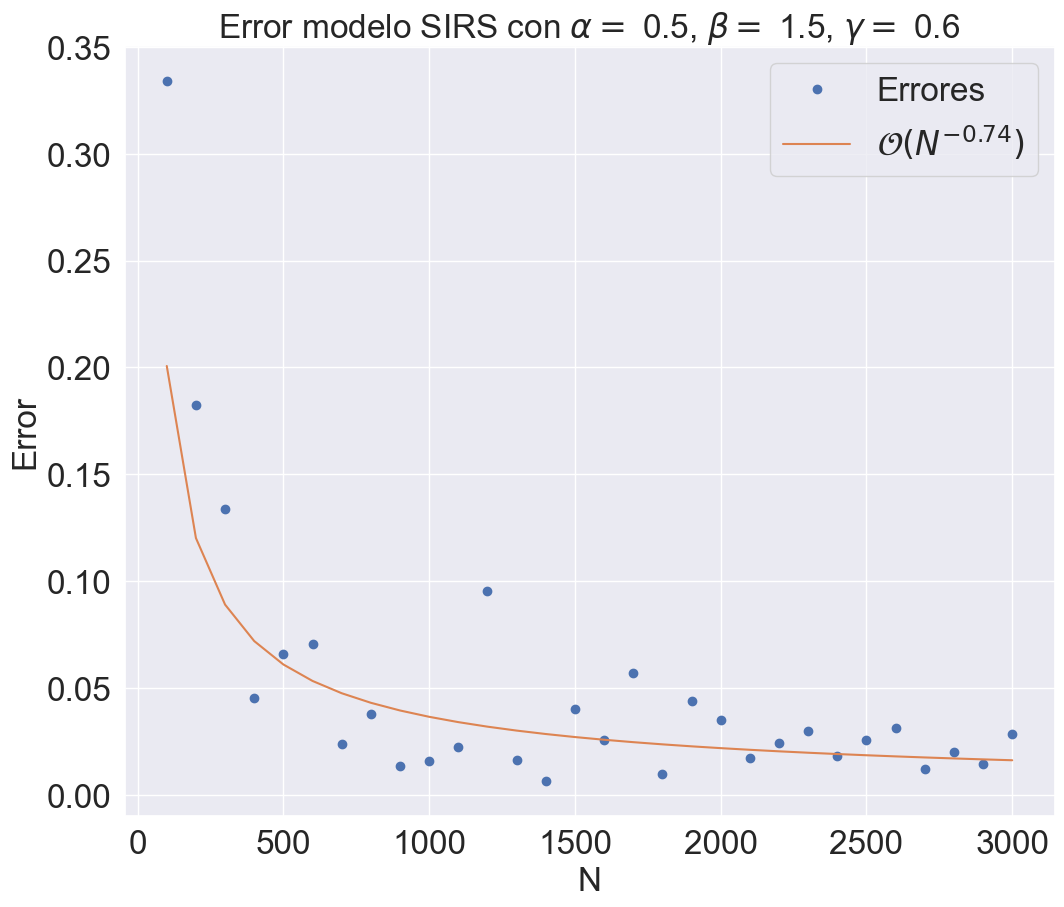

In [62]:
# Parámetros a utilizar
alpha, beta, gamma = alpha3, beta3, gamma3

# Número de puntos
Ns = np.arange(100, 3100, 100)

# Errores
errors = np.zeros(len(Ns))

# Cálculo de errores
for i in range(len(Ns)):
    x, x_koop = kEDMD_SIRS(alpha, beta, gamma, Ns[i])
    errors[i] = np.linalg.norm(x - x_koop)

# Ajustar una curva como raíz cuadrada a los errores
fit = np.polyfit(np.log(Ns), np.log(errors), 1)

# Gráfico
fig = plt.figure()

plt.plot(Ns, errors, 'o', label="Errores")
plt.plot(Ns, np.exp(fit[1])*Ns**fit[0], label=r'$\mathcal{O}(N^{%.2f})$' % fit[0])

plt.xlabel("N")
plt.ylabel("Error")

plt.legend()
plt.title(r"Error modelo SIRS con $\alpha = $ {}, $\beta = $ {}, $\gamma = $ {}".format(alpha3, beta3, gamma3))
plt.savefig(img_path+"SIRS3Errors.pdf", bbox_inches='tight')